In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

## Задача 1. Линейная регрессия: прогноз оклада по описанию вакансии.

Загрузите данные об описаниях вакансий и соответствующих годовых зарплатах из файла salary-train.csv

In [17]:
df_train = pd.read_csv('salary-train.csv')
df_train.head()

,FullDescription,LocationNormalized,ContractTime,SalaryNormalized
0,International Sales Manager London ****k ****...,London,permanent,33000
1,An ideal opportunity for an individual that ha...,London,permanent,50000
2,Online Content and Brand Manager// Luxury Reta...,South East London,permanent,40000
3,A great local marketleader is seeking a perman...,Dereham,permanent,22500
4,Registered Nurse / RGN Nursing Home for Young...,Sutton Coldfield,NaN,20355


Проведите предобработку:

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from scipy.sparse import hstack

for cur_column in data.columns.values[:-1]:
    # Приведите тексты к нижнему регистру (text.lower()).
    df_train[cur_column] = df_train[cur_column].str.lower()
    # Замените все, кроме букв и цифр, на пробелы — это облегчит дальнейшее разделение текста на слова.
    df_train[cur_column] = df_train[cur_column].replace('[^a-zA-Z0-9]', ' ', regex = True)

# Примените TfidfVectorizer для преобразования текстов в векторы признаков. 
# Оставьте только те слова, которые встречаются хотя бы в 5 объектах    
vectorizer = TfidfVectorizer(min_df=5)
X_train_nom = vectorizer.fit_transform(df_train['FullDescription'])

# Замените пропуски в столбцах LocationNormalized и ContractTime на 
# специальную строку 'nan'. Код для этого был приведен выше.
df_train['LocationNormalized'].fillna('nan', inplace=True)
df_train['ContractTime'].fillna('nan', inplace=True)

# Примените DictVectorizer для получения one-hot-кодирования признаков 
# LocationNormalized и ContractTime.
enc = DictVectorizer()
X_train_categ = enc.fit_transform(df_train[['LocationNormalized', 'ContractTime']].to_dict('records'))

# Объедините все полученные признаки в одну матрицу "объекты-признаки".
X = hstack([X_train_nom, X_train_categ])

Обучите гребневую регрессию с параметрами alpha=1 и random_state=241. Целевая переменная записана в столбце SalaryNormalized.

In [28]:
clf = Ridge(alpha = 1, random_state=241)
clf.fit(X, df_train['SalaryNormalized'])

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=241, solver='auto', tol=0.001)

Постройте прогнозы для двух примеров из файла salary-test-mini.csv. Значения полученных прогнозов являются ответом на задание. Укажите их через пробел.

In [ ]:
df_test = pd.read_csv('salary-test-mini.csv')

X_test_nom = vectorizer.transform(df_test['FullDescription'])
X_test_categ = enc.transform(df_test[['LocationNormalized', 'ContractTime']].to_dict('records'))

X_test = hstack([X_test_nom, X_test_categ])

res = clf.predict(X_test)

ans = '{:0.3f} {:0.3f}'.format(res[0], res[1])

print(ans)

with open('4_1.txt', 'w') as out_f:
    out_f.write(ans)

# Linear regression. Tasks for additional understanding.

Below I have implemented several linear regressions for 1D data form boston dataset.
Further I consider:
- Simple linear regression (My own implementation and Python implementation).
- Linear regrression with L2 regularization.

So, as we can see for 1D model results of all three approaches are identical.

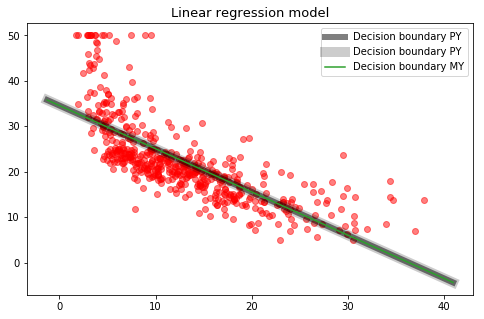

In [47]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

boston = load_boston()
X = boston.data[:,12]
y = boston.target

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(X, y, 'ro', alpha=0.5)
x_ = np.linspace(np.min(X)-3., np.max(X)+3., 100)

# Simple linear regression
clf = LinearRegression()
clf.fit(X.reshape(-1,1), y)

w1 = clf.coef_[0]
w0 = clf.intercept_
ax.plot(x_, w1*x_+w0, 'k', label='Decision boundary PY', lw = 6, alpha = 0.5)

# SVD linear regression with L2 regularizatin
clf = Ridge()
clf.fit(X.reshape(-1, 1), y)

w1 = clf.coef_[0]
w0 = clf.intercept_
ax.plot(x_, w1*x_+w0, 'k', label='Decision boundary PY', lw = 10, alpha = 0.2)

# Simple linear regression in myimplementation
X = np.c_[np.ones((X.shape[0])), X]
w = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T, y))
ax.plot(x_, w[1]*x_+w[0], 'C2', label='Decision boundary MY')


ax.set_title('Linear regression model', fontsize=13)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

## Задача 2. Составление фондового индекса.

Загрузите данные close_prices.csv. В этом файле приведены цены акций 30 компаний на закрытии торгов за каждый день периода.

In [44]:
df = pd.read_csv('close_prices.csv')
df = df.drop('date', axis=1)
df.head()

,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,HD,...,PFE,PG,T,TRV,UNH,UTX,V,VZ,WMT,XOM
0,76.440002,117.510002,85.029999,24.270000,125.519997,59.409999,64.750000,24.280001,165.250000,75.910004,...,28.799999,79.279999,34.220001,86.379997,71.820000,109.419998,196.240005,47.980000,76.419998,87.750000
1,76.070000,119.000000,85.110001,24.139999,124.489998,59.319997,64.320000,24.320000,162.970001,76.040001,...,28.709999,78.620003,34.090000,85.870003,72.320000,110.000000,193.339996,47.270000,75.750000,87.360001
2,75.989998,118.510002,84.500000,24.430000,124.070000,59.319997,64.449997,24.230000,162.309998,75.519997,...,28.490000,77.720001,34.049999,85.980003,71.980003,109.260002,191.559998,46.950001,74.650002,87.139999
3,76.320000,119.379997,84.199997,23.770000,123.489998,59.509996,65.239998,24.250000,162.289993,76.070000,...,28.520000,78.050003,34.230000,85.830002,72.160004,109.660004,193.559998,47.669998,74.620003,87.070000
4,75.889999,118.739998,83.800003,23.330000,122.639999,59.009995,65.190002,24.049999,159.850006,75.959999,...,28.879999,77.209999,33.980000,85.410004,71.989998,109.360001,193.050003,47.000000,74.360001,86.900002


На загруженных данных обучите преобразование PCA с числом компоненты равным 10. Скольких компонент хватит, чтобы объяснить 90% дисперсии?

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(df)

sum_ = 0.
max_id = 0
for i in range(pca.explained_variance_ratio_.shape[0]):
    sum_ += pca.explained_variance_ratio_[i]
    if sum_ > 0.9:
        max_id = i + 1
        print('{:} components -> {:0.3f} %'.format(max_id, sum_))
        break

with open('4_2_1.txt', 'w') as out_f:
    out_f.write(str(max_id))

4 components -> 0.928 %


Примените построенное преобразование к исходным данным и возьмите значения первой компоненты.

In [46]:
X = pca.transform(df)
first_component = X.T[0]

Загрузите информацию об индексе Доу-Джонса из файла djia_index.csv. Чему равна корреляция Пирсона между первой компонентой и индексом Доу-Джонса?

In [49]:
djia = pd.read_csv('djia_index.csv')['^DJI'].as_matrix()

corr = np.corrcoef(first_component, djia)[0][1]
print(corr)

with open('4_2_2.txt', 'w') as out_f:
    out_f.write(str(corr))

0.909652219305


Какая компания имеет наибольший вес в первой компоненте? Укажите ее название с большой буквы.

In [62]:
weights = []
for cur_comp in df.columns.values:
    weights.append(np.abs(np.corrcoef(df[cur_comp], first_component)[0][1]))

company = df.columns.values[np.array(weights).argmax()]
print(company)

with open('4_2_3.txt', 'w') as out_f:
    out_f.write(str(company))

V


# Principal component analysis. Additional tasks.

Below I illustrate importance of PCA method based on work with with [breast cancer](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) dataset.

First of all we obtain number of principal components - as a result we can see that **instead of 30 features we need only 4 features**.
So, furter we will perform classification based on Logistic Regression model for:
1. Full initial dataset (number of features = 30)
2. Principal components dataset (number of features = 4)

As a result we can see that on cross-validation mean score is almost the same, but elapset program time is signifucantlly lower then for full dataset classification.

Initial number of features: 30.
Principal number of features: 4
Logistic Regression (n_features=30) score : 0.95604719764
Logistic Regression (n_features=4) score : 0.947244216737


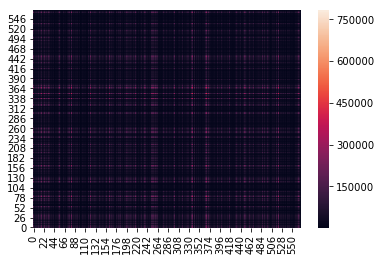

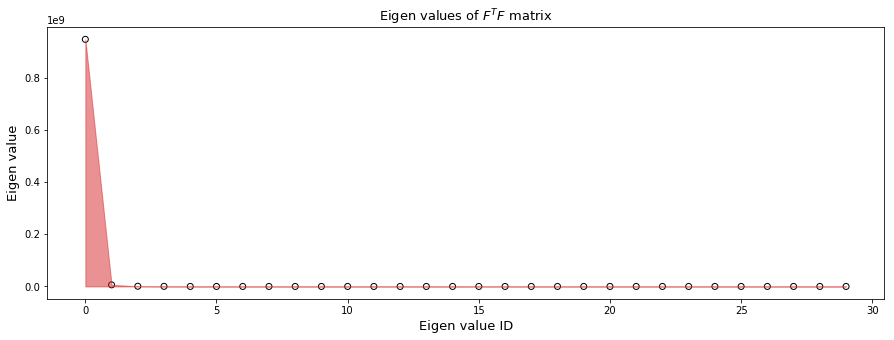

ValueError: Unknown format code 'd' for object of type 'float'

In [112]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

def optimal_comp(eigen_values, eps = 1e-5):
    eigen_values = np.sort(eigen_values)[::-1]
    for m in xrange(1, eigen_values.shape[0]-1):
        E = np.sum(eigen_values[m+1])/np.sum(eigen_values)
        if E < eps:
            return m
        
    return eigen_values.shape[0]


iris = load_breast_cancer()
X = iris.data
y = iris.target

eg_vals = np.linalg.eigvals(np.dot(X.T, X))
m = optimal_comp(eg_vals)
print('Initial number of features: {0}.\nPrincipal number of features: {1}'.format(eg_vals.shape[0], m))

cv = KFold(n_splits=5, shuffle=True, random_state=241)
clf = LogisticRegression(random_state=241, n_jobs=-1)
score_1 = np.mean(cross_val_score(clf, X, y, cv=cv, n_jobs=-1))
print('Logistic Regression (n_features={0}) score : {1}'.format(X.shape[1], score_1))

pca = PCA(n_components=m)
score_2 = np.mean(cross_val_score(clf, pca.fit_transform(X), y, cv=cv, n_jobs=-1))
print('Logistic Regression (n_features={0}) score : {1}'.format(m, score_2))


fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(np.arange(0, eg_vals.shape[0], 1), eg_vals, facecolors='none', edgecolors='k')
ax.fill_between(np.arange(0, eg_vals.shape[0], 1), 0, eg_vals, color='C3', alpha=0.5)
ax.set_title(r'Eigen values of $F^{T}F$ matrix', fontsize=13)
ax.set_xlabel('Eigen value ID', fontsize=13)
ax.set_ylabel('Eigen value', fontsize=13)

plt.show()

ax = sns.heatmap(np.cov(X), annot=True, fmt="d")
plt.show()

